## Results
***

0. [Loading data](#load)
1. [Q1: Performance of XGBoost with respect to classic models](#q1)

### 0. Loading data

In [1]:
%%capture
%run 4_analysis.ipynb

### Q1: Performance of XGBoost with respect to classic models<a id='q1'>

In this section, we will understand the meaning of the scores we obtained from the analysis in order to answer the first question exposed in the <a href='0_abstract.ipynb'>abstract</a>:
<ul><li><b>Does XGBoost outperforms the 7 state-of-the-art ML classifiers for defect prediction?</b></li></ul>

To answer this question, let's explore our scores:

In [2]:
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if cell else '' for cell in is_max]

In [3]:
models = [
    'Logistic Regression',
    'Naive Bayes Classifier',
    'K-Nearest Neighbor',
    'Neural Network',
    'Support Vector Machine',
    'Decision Tree',
    'Random Forest',
    'XG-Boost'
]

In [4]:
auc = pd.DataFrame(auc_scores)
auc.index = [name.upper() for name in names]
auc.columns = models
auc = auc.transpose()
auc['mean'] = np.mean(auc, axis=1)
auc.style.apply(highlight_max)

,ANT,CAMEL,IVY,JEDIT,LOG4J,TOMCAT,VELOCITY,XALAN,XERCES,mean
Logistic Regression,0.725444,0.727074,0.795072,0.711623,0.875350,0.753992,0.748353,0.700241,0.777193,0.757149
Naive Bayes Classifier,0.682210,0.628297,0.710337,0.719298,0.809524,0.641053,0.474308,0.618347,0.625387,0.656529
K-Nearest Neighbor,0.869209,0.819087,0.883413,0.701754,0.752101,0.851251,0.761528,0.904062,0.820949,0.818151
Neural Network,0.747867,0.756847,0.912861,0.785088,0.774510,0.799447,0.574440,0.789683,0.751393,0.765793
Support Vector Machine,0.736895,0.662055,0.807091,0.729715,0.726891,0.743338,0.604743,0.718682,0.625181,0.706066
Decision Tree,0.805643,0.829162,0.905048,0.811952,0.691877,0.870226,0.694335,0.859127,0.871001,0.815374
Random Forest,0.888410,0.925441,0.947716,0.877193,0.798319,0.949928,0.718050,0.885193,0.944169,0.881602
XG-Boost,0.881879,0.927826,0.944111,0.866776,0.768908,0.939731,0.761528,0.889395,0.926729,0.878542


In [5]:
f1 = pd.DataFrame(f1_scores)
f1.index = [name.upper() for name in names]
f1.columns = models
f1 = f1.transpose()
f1['mean'] = np.mean(f1, axis=1)
f1.style.apply(highlight_max)

,ANT,CAMEL,IVY,JEDIT,LOG4J,TOMCAT,VELOCITY,XALAN,XERCES,mean
Logistic Regression,0.730159,0.737451,0.800444,0.718760,0.868695,0.756694,0.751302,0.694403,0.782528,0.760048
Naive Bayes Classifier,0.686242,0.631175,0.717970,0.728080,0.784756,0.638822,0.474777,0.590392,0.649687,0.655767
K-Nearest Neighbor,0.859758,0.810933,0.879634,0.698658,0.759593,0.851297,0.751923,0.906780,0.811719,0.814477
Neural Network,0.751818,0.751798,0.913793,0.790005,0.762337,0.803446,0.594048,0.791684,0.780183,0.771012
Support Vector Machine,0.741677,0.671883,0.815422,0.738977,0.706290,0.746131,0.624568,0.718226,0.648917,0.712455
Decision Tree,0.804931,0.829383,0.905251,0.802566,0.684211,0.868654,0.680213,0.859080,0.873578,0.811985
Random Forest,0.888445,0.925715,0.948276,0.872527,0.789474,0.948153,0.716498,0.885463,0.937092,0.879071
XG-Boost,0.883569,0.929334,0.948025,0.860919,0.763650,0.937783,0.751923,0.889842,0.929577,0.877180


In [6]:
savecsv(auc, fileName = 'Table1_AUC')
savecsv(f1, fileName = 'Table2_F1')

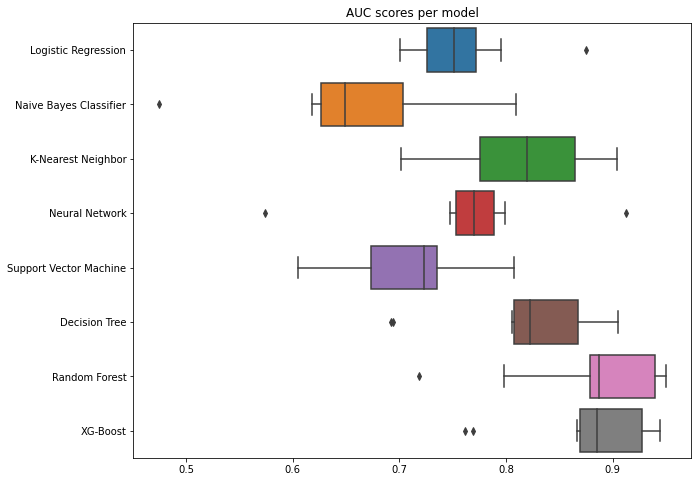

<Figure size 432x288 with 0 Axes>

In [7]:
def boxplot_auc():
    plt.figure(figsize=(10,8))
    sns.boxplot(data=auc.transpose(), orient='h')
    plt.title('AUC scores per model')
    plt.show()
    savefig('Fig1_AUCs')
    
boxplot_auc()

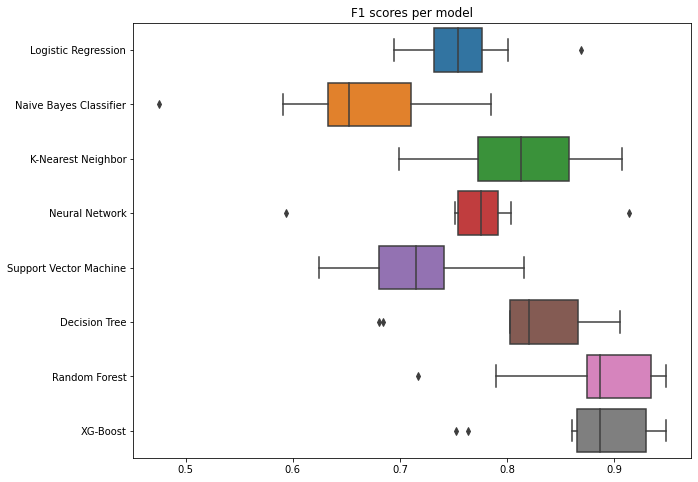

<Figure size 432x288 with 0 Axes>

In [8]:
def boxplot_f1():
    plt.figure(figsize=(10,8))
    sns.boxplot(data=f1.transpose(), orient='h')
    plt.title('F1 scores per model')
    plt.show()
    savefig('Fig2_F1')
    
boxplot_f1()

Literature often considers Random Forest as a relevant model for defect prediction. As we can see from our results, it is indeed a very strong model. XGboost outperformed classical models in 4 datasets above 9, but we can see as his average is the highest one among all the models. We can conclude that, by overall, XGBoost is the best model among these to predict software defects

### Q2: Impact of the number of features on the models' performances

In order to understand the impact that the number of features has on performances of the models, we need to compare our results with scores obtained by analyzing the same datasets with less features.

We will use XG-Boost to re-analyze the data.

Our datasets have 20 features each. In order to discover which of these features is more relevant to the models, we will use a measure called **SHAP Value**. 

SHAP Values (acronym for *SHapley Additive exPlanations*) show the impact of each feature on the prediction of the model.

We will implement SHAP Values by **installing and importing *shap* library** (it can be installed in anaconda by running `conda install -c conda-forge shap`)

In [9]:
import shap
shap.initjs()

Let's understand SHAP Values by exploring them on XGBoost applied on `ant`

In [10]:
model = XGB.fit(splitted['ant'][0], splitted['ant'][2])
X = pd.concat([splitted['ant'][0], splitted['ant'][1]], axis=0)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


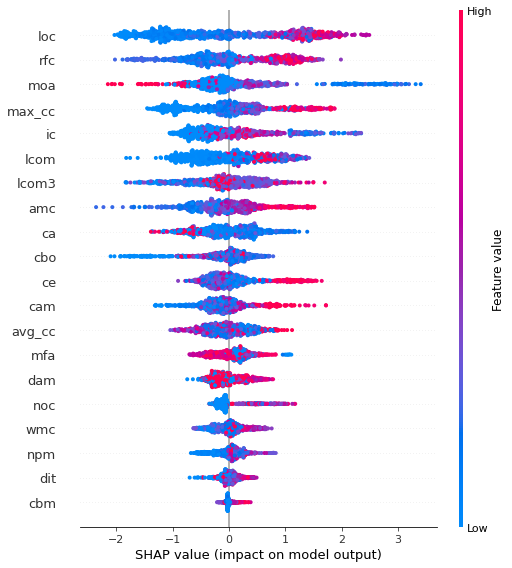

In [11]:
shap.summary_plot(shap_values, X)

In [12]:
values_dict = dict()
for i in range(len(X.columns)):
    values_dict[X.columns[i]] = np.abs(shap_values).mean(0)[i]
values_dict

{'wmc': 0.20052667,
 'dit': 0.10810094,
 'noc': 0.20620596,
 'cbo': 0.32431823,
 'rfc': 0.6144792,
 'lcom': 0.5264004,
 'ca': 0.39686334,
 'ce': 0.32091242,
 'npm': 0.171116,
 'lcom3': 0.45590225,
 'loc': 1.0281415,
 'dam': 0.21855424,
 'moa': 0.5747928,
 'mfa': 0.24053645,
 'cam': 0.3030452,
 'ic': 0.53299284,
 'cbm': 0.042888988,
 'amc': 0.42349064,
 'max_cc': 0.55993974,
 'avg_cc': 0.30151388}

In [13]:
features = X.columns[np.argsort(np.abs(shap_values).mean(0))]

In [14]:
features

Index(['cbm', 'dit', 'npm', 'wmc', 'noc', 'dam', 'mfa', 'avg_cc', 'cam', 'ce',
       'cbo', 'ca', 'amc', 'lcom3', 'lcom', 'ic', 'max_cc', 'moa', 'rfc',
       'loc'],
      dtype='object')

In [15]:
splitted['ant'][0].loc[:, splitted['ant'][0].columns.isin(features[0:])]

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
981,12.402567,2.000000,0.0,8.298716,51.489303,50.116688,0.900428,7.398288,6.502139,0.831649,453.684168,0.933619,0.00000,0.727273,0.348264,2.000000,5.800856,36.499248,6.697005,1.490435
648,7.000000,2.000000,0.0,4.000000,21.000000,3.000000,2.000000,4.000000,7.000000,0.666667,108.000000,1.000000,0.00000,0.500000,0.428571,1.000000,1.000000,13.714286,2.000000,1.000000
507,22.000000,4.000000,0.0,25.000000,172.000000,151.000000,1.000000,25.000000,10.000000,0.921769,1224.000000,0.285714,2.00000,0.787879,0.178030,1.000000,1.000000,54.000000,12.000000,2.227300
189,2.000000,2.000000,0.0,8.000000,34.000000,1.000000,1.000000,7.000000,2.000000,2.000000,346.000000,0.000000,0.00000,0.958333,1.000000,1.000000,1.000000,172.000000,1.000000,0.500000
575,42.000000,3.000000,4.0,19.000000,107.000000,739.000000,4.000000,15.000000,33.000000,0.928862,898.000000,0.958333,2.00000,0.474359,0.193122,0.000000,0.000000,19.809524,10.000000,1.619000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,18.222289,4.185141,0.0,9.000000,38.889155,135.112042,1.185141,7.814859,17.000000,0.928003,165.112640,0.703715,0.59257,0.810888,0.267561,2.185141,3.370282,7.501145,2.000000,1.055215
667,5.000000,2.000000,0.0,7.000000,14.000000,0.000000,6.000000,3.000000,5.000000,0.375000,51.000000,1.000000,0.00000,0.600000,0.466667,1.000000,1.000000,8.800000,1.000000,0.800000
656,42.000000,3.000000,21.0,47.000000,98.000000,0.000000,21.000000,26.000000,40.000000,0.000000,327.000000,1.000000,1.00000,0.474359,0.073413,2.000000,2.000000,6.761905,6.000000,1.166700
382,11.000000,3.000000,0.0,9.000000,38.000000,29.000000,0.000000,9.000000,9.000000,0.888889,260.000000,0.666667,3.00000,0.804348,0.228571,3.000000,3.000000,21.818182,2.000000,1.000000


In [16]:
shap_ant_auc = dict()
for i in range(len(X.columns)):
    X_train = splitted['ant'][0].loc[:, splitted['ant'][0].columns.isin(features[:i+1])]
    X_test = splitted['ant'][1].loc[:, splitted['ant'][1].columns.isin(features[:i+1])]
    XGB.fit(X_train, splitted['ant'][2])
    y_pred = XGB.predict(X_test)
    auc = roc_auc_score(splitted['ant'][3], y_pred, average ='weighted')
    shap_ant_auc[str(i+1)] = auc

shap_ant_auc

{'1': 0.7403343782654127,
 '2': 0.8103012887495646,
 '3': 0.8393852316266108,
 '4': 0.8264541971438523,
 '5': 0.8329850226401949,
 '6': 0.8517067223963776,
 '7': 0.8236241727621038,
 '8': 0.8200539881574364,
 '9': 0.8416057122953675,
 '10': 0.855276907001045,
 '11': 0.8739986067572274,
 '12': 0.8430860327412051,
 '13': 0.8610675722744688,
 '14': 0.8567572274468827,
 '15': 0.8884099616858238,
 '16': 0.8732584465343086,
 '17': 0.8826192964123999,
 '18': 0.8884099616858238,
 '19': 0.8797892720306514,
 '20': 0.881879136189481}

In [17]:
def get_n_features(values) -> int:
    i = values.index(max(values))
    return i+1

shap_auc = dict()

for i in range(len(X.columns)):
    shap_auc[str(i+1)] = list()

tot_features = dict()
iter = 0

for key in names:
    
    aucs = list()
    
    model = XGB.fit(splitted[key][0], splitted[key][2])
    X = pd.concat([splitted[key][0], splitted[key][1]], axis=0)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    features = X.columns[np.argsort(-np.abs(shap_values).mean(0))]
    
    for i in range(len(X.columns)):
        X_train = splitted[key][0].loc[:, splitted[key][0].columns.isin(features[:i+1])]
        X_test = splitted[key][1].loc[:, splitted[key][1].columns.isin(features[:i+1])]
        XGB.fit(X_train, splitted[key][2])
        y_pred = XGB.predict(X_test)
        auc = roc_auc_score(splitted[key][3], y_pred, average ='weighted')
        aucs.append(auc)
        shap_auc[str(i+1)].append(aucs[i])
    
        
    n_features = get_n_features(aucs)
    tot_features[key] = list(features[:n_features])
    
    iter += 1
    
tot_features

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


{'ant': ['loc', 'rfc', 'moa', 'max_cc', 'ic', 'lcom', 'lcom3', 'amc', 'ca'],
 'camel': ['npm',
  'dit',
  'rfc',
  'ce',
  'max_cc',
  'ca',
  'ic',
  'moa',
  'lcom3',
  'loc',
  'amc',
  'cam',
  'dam',
  'lcom',
  'avg_cc',
  'cbo',
  'wmc'],
 'ivy': ['loc',
  'cam',
  'dam',
  'moa',
  'ce',
  'lcom3',
  'npm',
  'ca',
  'wmc',
  'amc',
  'cbo',
  'lcom',
  'rfc',
  'dit',
  'ic',
  'avg_cc',
  'max_cc'],
 'jedit': ['moa',
  'dam',
  'rfc',
  'avg_cc',
  'loc',
  'max_cc',
  'dit',
  'mfa',
  'cam',
  'npm',
  'ca',
  'wmc',
  'ce',
  'cbo',
  'lcom',
  'amc',
  'lcom3',
  'ic'],
 'log4j': ['dam', 'npm', 'wmc'],
 'tomcat': ['moa',
  'cbo',
  'max_cc',
  'loc',
  'dam',
  'dit',
  'ca',
  'avg_cc',
  'rfc',
  'cam',
  'amc',
  'lcom3',
  'lcom'],
 'velocity': ['ce', 'cam', 'ic', 'lcom3', 'mfa', 'amc', 'cbo', 'loc'],
 'xalan': ['loc', 'max_cc', 'mfa', 'dit', 'cbo', 'lcom'],
 'xerces': ['dam',
  'ce',
  'loc',
  'cam',
  'ic',
  'rfc',
  'wmc',
  'lcom3',
  'dit',
  'avg_cc',
  'amc']